<a href="https://colab.research.google.com/github/DaniSFprog/Notebooks_ML/blob/main/ENTREGABLE_2_ML_Editado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Entregable 2   </p> Métodos de Clasificación </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Aprendizaje Automático de Máquina </p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría MACC 2024-1</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> **Objetivo del estudio de caso y resultados de aprendizaje** </FONT>

En este estudio de caso se espera que el estudiante:

- Cargue y explore datos estructurados.

- Realice análisis exploratorio de datos.

- Aplique modelos de clasificación.

- Evalúe el modelo usandon matriz de confusión y las métricas asociadas.

# <FONT SIZE=5 COLOR="purple"> **Indicaciones** </FONT>

- Para entregar en grupos de máximo tres integrantes.

- **Importante:** Cargar en la plataforma *e-aulas* los **dos** archivos: ***.ipynb*** y ***.pdf***

- Fecha de entrega el día **miércoles 8 de Mayo, antes de las 6:00 p.m**

# <FONT SIZE=3 COLOR="blue"> **Librerias** </FONT>

In [52]:
############################################################################
# librerías para cálculos e importar datos
import numpy as np
import pandas as pd
############################################################################
# librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api        as sm
# Para graficar los árbolitos
from sklearn.tree             import export_graphviz
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch
#############################################################################
# binarizar labels y label encoder
# entrenamiento y prueba y para escalar
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import StandardScaler,MinMaxScaler,label_binarize,LabelEncoder
##############################################################################
# métricas de evaluación y las matrices de confusión
from sklearn                   import metrics
from sklearn.metrics           import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics           import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics           import roc_curve, auc, accuracy_score,roc_auc_score
# selección de características
from sklearn.feature_selection import RFE
# búsqueda en grilla
from sklearn.model_selection   import GridSearchCV
#crossvalidation
from sklearn.model_selection import cross_val_score
#Levenberg-Marquardt es un método de optimización que combina dos enfoques
#clásicos para la minimización de errores cuadráticos no lineales:
#el método de Gauss-Newton y el método del gradiente descendente
#Levenberg-Marquardt
from scipy.optimize import curve_fit
#############################################################################
# Para los modelos de machine learning
# Para aplicar modelo de k-nearest neighbor
from sklearn.neighbors          import KNeighborsClassifier
# Para aplicar modelo de regresión logística
from sklearn.linear_model      import LogisticRegression
# Para aplicar modelo de Arboles de decición
from sklearn.tree             import DecisionTreeClassifier
# Para aplicar modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
# Para aplicar modelo de Suport vector machine
from sklearn.svm import SVC
# Para aplicar modelo de eXtreme Gradient Boosting
from xgboost import XGBClassifier
# Para aplicar modelo de Naive bayes
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
#############################################################################
# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")

# <FONT SIZE=3 COLOR="blue"> **Funciones** </FONT>

**Busqueda de hiperparametros KNN**

In [ ]:
def search_best_knn_params(X_train, y_train, accuracy_threshold):
    # Definir los hiperparámetros
    param_grid = {
        'n_neighbors': range(1, 21),  # Número de vecinos
        'weights': ['uniform', 'distance'],  # Tipo de ponderación
        'algorithm': ['ball_tree', 'kd_tree', 'brute']  # Algoritmo para computar los vecinos más cercanos
    }

    # Resultados iniciales
    best_score = 0
    best_params = {}

    # Iterar sobre cada combinación de parámetros
    for n_neighbors in param_grid['n_neighbors']:
        for weights in param_grid['weights']:
            for algorithm in param_grid['algorithm']:
                # Configurar el modelo
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
                # Calcular la exactitud media usando validación cruzada
                scores = cross_val_score(knn, X_train, y_train, cv=5)
                mean_score = np.mean(scores)

                # Actualizar los mejores parámetros si la exactitud mejora
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm}

                    # Detener si la exactitud supera el umbral deseado
                    if best_score >= accuracy_threshold:
                        print("Deteniendo la búsqueda con una exactitud de:", best_score)
                        print("Mejores parámetros:", best_params)
                        return best_params, best_score  # Detener la función si se encuentra un modelo con la exactitud deseada

    # Si se completa el bucle sin alcanzar la exactitud deseada, se pueden mostrar los mejores resultados encontrados
    print("Mejor exactitud encontrada:", best_score)
    print("Mejores parámetros:", best_params)
    return best_params, best_score

# Llamar a la función con los datos de entrenamiento
#best_params, best_score = search_best_knn_params(X_train, y_train, accuracy_threshold=0.95)

# Imprimir los resultados
#print("Los mejores parámetros encontrados son:", best_params)
#print("Con una exactitud de:", best_score)

**Busqueda de hiperparametros Regesion logistica**

In [ ]:
def search_best_logreg_params(X_train, y_train, accuracy_threshold):
    # Definir los hiperparámetros
    param_grid = {
        'C': [0.1, 1, 10],  # Parámetro de regularización
        'solver': ['liblinear', 'saga'],  # Algoritmos de optimización
        'max_iter': [100, 200, 300]  # Número de iteraciones
    }

    # Resultados iniciales
    best_score = 0
    best_params = {}

    # Iterar sobre cada combinación de parámetros
    for C in param_grid['C']:
        for solver in param_grid['solver']:
            for max_iter in param_grid['max_iter']:
                # Configurar el modelo
                logreg = LogisticRegression(C=C, solver=solver, max_iter=max_iter)
                # Calcular la exactitud media usando validación cruzada
                scores = cross_val_score(logreg, X_train, y_train, cv=5)
                mean_score = np.mean(scores)

                # Actualizar los mejores parámetros si la exactitud mejora
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'C': C, 'solver': solver, 'max_iter': max_iter}

                    # Detener si la exactitud supera el umbral deseado
                    if best_score >= accuracy_threshold:
                        print("Deteniendo la búsqueda con una exactitud de:", best_score)
                        print("Mejores parámetros:", best_params)
                        return best_params, best_score

    # Retornar los mejores parámetros encontrados
    return best_params, best_score
# Llamar a la función con los datos de entrenamiento
#best_params, best_score = search_best_logreg_params(X_train, y_train, accuracy_threshold=0.95)
# Ejemplo de cómo usar la función
# Asegúrate de que X_train y y_train están definidos y listos para usar
# best_params, best_score = search_best_logreg_params(X_train, y_train)

**Busqueda de hiperparametros decision tree**

In [ ]:
def search_best_decision_tree_params(X_train, y_train, accuracy_threshold):
    # Definir los hiperparámetros
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4]
    }

    # Resultados iniciales
    best_score = 0
    best_params = {}

    # Iterar sobre cada combinación de parámetros
    for criterion in param_grid['criterion']:
        for max_depth in param_grid['max_depth']:
            for min_samples_split in param_grid['min_samples_split']:
                for min_samples_leaf in param_grid['min_samples_leaf']:
                    # Configurar el modelo
                    dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf)
                    # Calcular la exactitud media usando validación cruzada
                    scores = cross_val_score(dt, X_train, y_train, cv=5)
                    mean_score = np.mean(scores)

                    # Actualizar los mejores parámetros si la exactitud mejora
                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf
                        }

                        # Detener si la exactitud supera el umbral deseado
                        if best_score >= accuracy_threshold:
                            print("Deteniendo la búsqueda con una exactitud de:", best_score)
                            print("Mejores parámetros:", best_params)
                            return best_params, best_score

    # Retornar los mejores parámetros encontrados si no se alcanza el umbral
    return best_params, best_score
# Llamar a la función con los datos de entrenamiento
#best_params, best_score = search_best_decision_tree_params(X_train, y_train, accuracy_threshold=0.95)
# Ejemplo de cómo usar la función
# Asegúrate de que X_train y y_train están definidos y listos para usar
# best_params, best_score = search_best_decision_tree_params(X_train, y_train)




# <FONT SIZE=5 COLOR="green"> **Punto 1. Carga y preparación de los datos** </FONT>

1. Cargue el conjunto de datos denominado **mobile_price** que puede encontrar en la siguiente ruta:

```python
https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/mobile_price.csv
```

In [53]:
# 2. Importar datos
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/mobile_price.csv"
datos_movil = pd.read_csv(url)
datos_movil.head(15)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


2. Haga una exploración y descripción rápida de los datos usando las funciones vistas en clase. Para la descripción de las variables se puede apoyar de la fuente: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download.


In [ ]:
datos_movil.info()

In [ ]:
datos_movil.isnull().sum()

In [ ]:
datos_movil.isna().sum()

In [ ]:
datos_movil.shape

In [ ]:
datos_movil.duplicated().sum()

In [9]:
datos_movil.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [54]:
px.scatter(x= datos_movil.ram , y= datos_movil.battery_power)

3. ¿Hay datos faltantes? ¿Para qué sirve la librería *missingno*?

```python
import missingno as msno
msno.matrix(dataset)
plt.show()
```

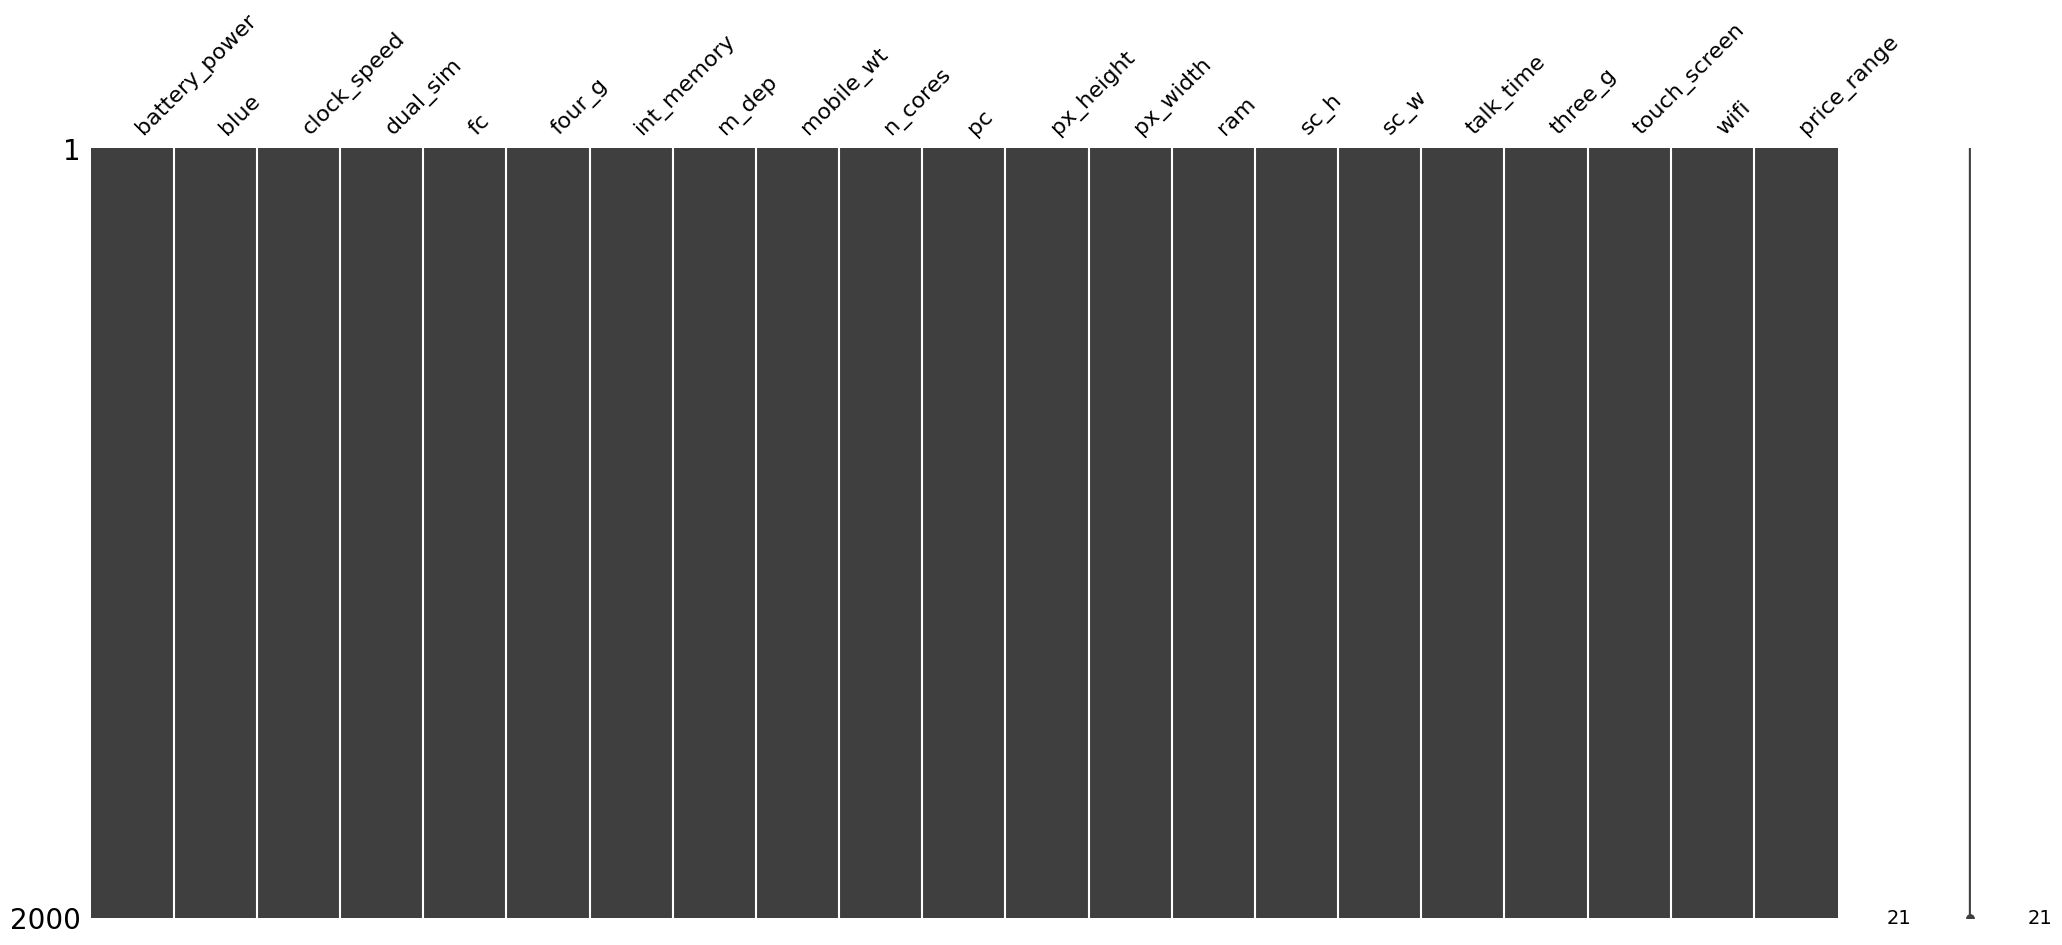

In [55]:
import missingno as msno
msno.matrix(datos_movil)
plt.show()

La matriz que se genera muestra las filas en el eje y, las columnas en el eje x, y los datos faltantes se representan generalmente con rayas blancas o espacios en blanco dentro de la matriz. Las áreas donde se muestran datos indican la presencia de valores no nulos. La gráfica también puede incluir una línea de chispa a la derecha que resume la integridad general de los datos de la fila.
¿Qué puedes inferir de esta visualización?: La visualización es particularmente útil para identificar patrones de datos faltantes, ver si la falta de datos es aleatoria o no, y comprobar si hay alguna tendencia sistemática que cause que los datos falten.
Missingno es útil para visualizar la distribución y las características de los datos faltantes en un DataFrame


4. Examine la variable *px_height*. ¿Tiene valores iguales a cero, cuántos? En caso afirmativo, cambie estos valores por la media de la variable. Explique.

In [56]:
# Contar cuántos valores iguales a cero hay en px_height
num_zeros = (datos_movil['px_height'] == 0).sum()
print(f'Número de valores iguales a cero en px_height: {num_zeros}')

# Calcular la media de px_height excluyendo los ceros
mean_px_height = datos_movil.loc[datos_movil['px_height'] != 0, 'px_height'].mean()
print(f'Media de px_height (excluyendo ceros): {mean_px_height}')

# Reemplazar los ceros en px_height por la media calculada
datos_movil.loc[datos_movil['px_height'] == 0, 'px_height'] = mean_px_height

Número de valores iguales a cero en px_height: 2
Media de px_height (excluyendo ceros): 645.7537537537537


**Contar valores a cero:** Utilizamos una máscara booleana para identificar y contar los registros en px_height que tienen un valor de cero. Esto es útil para entender la magnitud del problema.<br>

**Calcular la media excluyendo ceros:** La media se calcula excluyendo los ceros para evitar distorsionar la medida. Esto asegura que el valor usado para la imputación refleje más precisamente los datos existentes.<br>

**Reemplazo de valores:** Finalmente, los valores cero son reemplazados por la media calculada. Esto puede ayudar a mejorar el análisis estadístico posterior, ya que los ceros podrían ser valores atípicos o errores de entrada que distorsionarían los resultados del análisis.

5. Haga una tabla de frecuencia de la variable **price_range**. Los cuatro rangos son:

   * 0 - low cost
   * 1 - medium cost
   * 2 - high cost
   * 3 - very high cost

In [57]:
# Calculamos la tabla de frecuencia para la variable 'price_range' en el dataset datos_movil
price_range_counts = datos_movil['price_range'].value_counts().sort_index()

# Crear un DataFrame para una presentación más clara
price_range_df = pd.DataFrame({
    'Price Range': ['low cost', 'medium cost', 'high cost', 'very high cost'],
    'Frequency': price_range_counts.values
})

# Mostrar la tabla de frecuencia
print(price_range_df)


      Price Range  Frequency
0        low cost        500
1     medium cost        500
2       high cost        500
3  very high cost        500


6. Convierta la variable **price_range** en una variable de dos categorias fusionando las clases {0,1}--->0 y {2,3}---->1.

Con el conjunto de datos resultante continuar con el siguiente punto

In [58]:
# Convertimos la variable 'price_range' en una variable de dos categorías
datos_movil['price_range'] = datos_movil['price_range'].apply(lambda x: 0 if x in [0, 1] else 1)

# Verificar los cambios realizados en la columna 'price_range'
price_range_updated_counts = datos_movil['price_range'].value_counts()

# Mostrar las nuevas frecuencias
print(price_range_updated_counts)

price_range
0    1000
1    1000
Name: count, dtype: int64


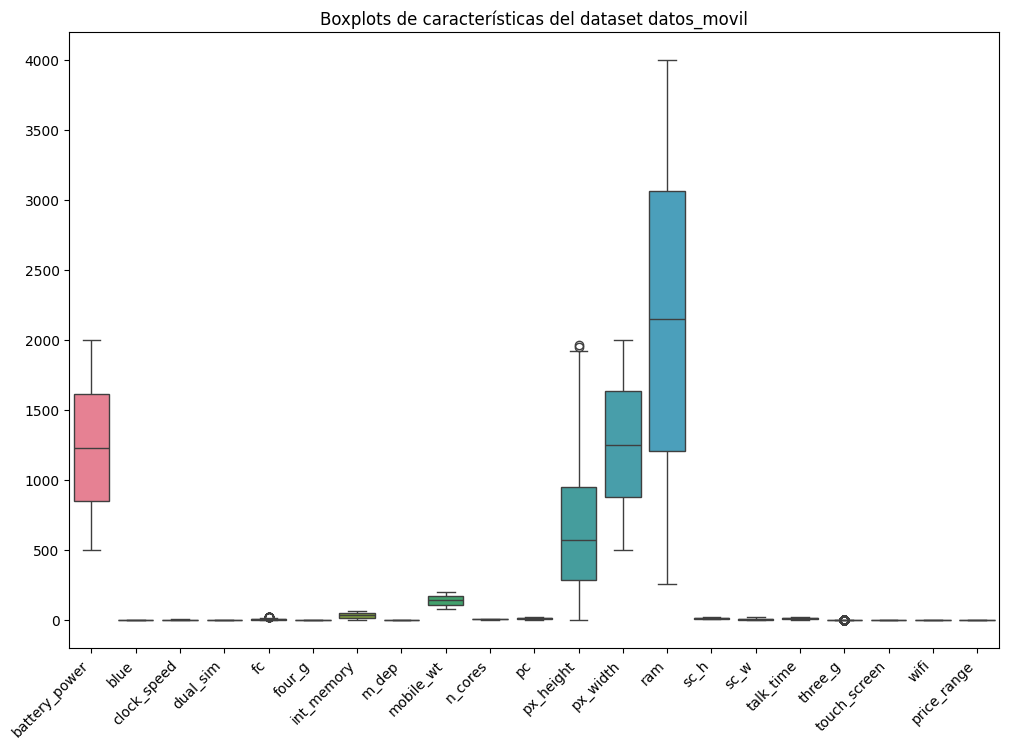

In [59]:
datos_movil.head(5)
# Configurando el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creando un boxplot para cada columna numérica en el DataFrame
sns.boxplot(data=datos_movil)

# Rotando las etiquetas del eje x para mejor visualización si hay muchas características
plt.xticks(rotation=45, ha='right')

# Añadiendo título y mostrando el gráfico
plt.title('Boxplots de características del dataset datos_movil')
plt.show()

**Con el conjunto de datos resultante continuar con el siguiente punto**

# <FONT SIZE=3 COLOR="Blue"> *Se preparan los datos para aplicar lo modelos y obtener un mejor resultado* </FONT>

In [60]:
# Definir las características (X) y el target (y)
X = datos_movil.drop('price_range', axis=1)
y = datos_movil['price_range']
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

In [61]:
print("El tamaño de X_train es {}".format(X_train.shape))
print("El tamaño de y_train es: {}".format(y_train.shape))
print("El tamaño de X_test es {}".format(X_test.shape))
print("El tamaño de y_test es: {}".format(y_test.shape))

El tamaño de X_train es (1600, 20)
El tamaño de y_train es: (1600,)
El tamaño de X_test es (400, 20)
El tamaño de y_test es: (400,)


In [62]:
X_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1264,676,0,2.2,0,1,1,39,0.2,84,1,5,864.0,1011,2064,13,7,6,1,0,0
722,1156,0,0.5,0,6,0,61,0.1,89,7,9,1214.0,1262,1796,16,6,13,0,1,1
210,1395,0,1.8,1,0,0,23,0.1,111,3,1,213.0,705,2571,11,0,13,1,0,1
252,708,1,2.7,1,0,1,63,1.0,195,8,7,78.0,654,2169,6,5,7,1,1,1
297,1329,1,1.0,0,1,0,52,0.9,181,6,2,1053.0,1458,1228,8,6,6,1,0,1


Si tus datos incluyen características con valores extremos o no siguen una distribución normal, MinMaxScaler puede ser una mejor opción para evitar que estos valores extremos afecten el rendimiento del modelo. Por otro lado, si tus características son más homogéneas y centradas, StandardScaler podría ser más adecuado.

Para tu dataset en particular, que contiene características como RAM, resolución de pantalla y capacidad de batería, que probablemente tienen rangos muy variados, MinMaxScaler podría ser más apropiado para asegurar que todas las características influyan equitativamente en el modelo.

In [63]:
# Estandarizar las características

datos_movil_escalado_SS = StandardScaler()
datos_movil_escalado_MM = MinMaxScaler()

X_train = datos_movil_escalado_SS.fit_transform(X_train)
X_test = datos_movil_escalado_SS.transform(X_test)

#X_train = datos_movil_escalado_MM.fit_transform(X_train)
#X_test = datos_movil_escalado_MM.transform(X_test)

print(X_train)

[[-1.26025416 -0.99750312  0.83126035 ...  0.56291423 -1.
  -1.01511421]
 [-0.16850963 -0.99750312 -1.25475142 ... -1.77646958  1.
   0.98511083]
 [ 0.37508817 -0.99750312  0.34043405 ...  0.56291423 -1.
   0.98511083]
 ...
 [ 1.13930934  1.00250313  0.95396692 ... -1.77646958  1.
  -1.01511421]
 [ 1.29852208 -0.99750312 -1.25475142 ...  0.56291423 -1.
  -1.01511421]
 [-1.38307542  1.00250313  0.46314063 ...  0.56291423  1.
   0.98511083]]


# <FONT SIZE=5 COLOR="green"> **Punto 2. Modelos de Machine Learning** </FONT>

1. Para **KNN**

   a. Aplique el modelo.

   b. Evalúe el modelo. Matriz de confusión

   c. Gráfique la curva ROC y calcule el valor AUC


In [64]:
KNN = KNeighborsClassifier(n_neighbors = 3,              # número de vecinos k=10
                           metric = 'euclidean')          # métrica euclideana
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [65]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_KNN = KNN.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicciones')

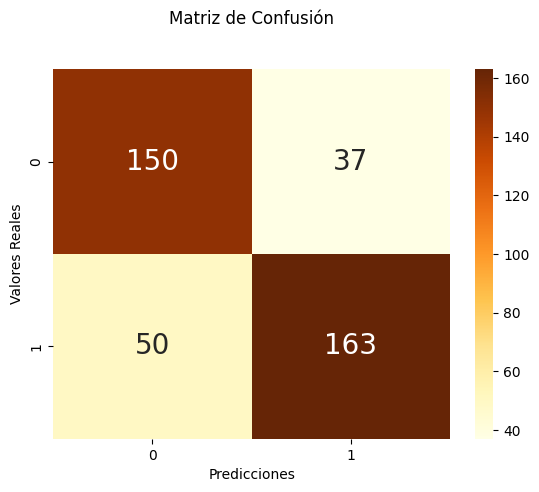

In [66]:
cm = metrics.confusion_matrix(y_test, y_pred_KNN)
p = sns.heatmap(pd.DataFrame(cm),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [67]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       187
           1       0.81      0.77      0.79       213

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



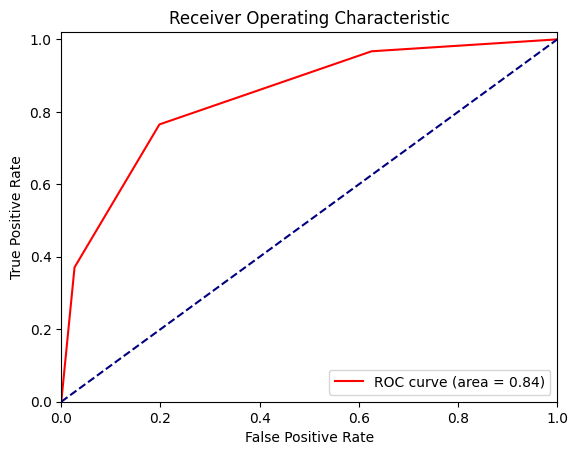

AUC: 0.8409153674273806


In [69]:
# Curva ROC y AUC
y_prob = KNN.predict_proba(X_test)[:, 1]  # obtener probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='red' , label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

In [70]:
# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"n_neighbors" : list(range(1, 20)),         # se recorre la lista en k
               "weights" : ["uniform","distance"],         # se establecen los pesos
               "metric" : ["euclidean","manhattan","minkowski"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Grid_Search = GridSearchCV(KNN,                            # el modelo aplicado
                  grid_params,                             # los parámetros que van a variar
                  cv = 20,                                 # el número de folds
                  verbose = 0)                             # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res = Grid_Search.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
# Definimos los parámetros que vamos a combinar en un diccionario
grid_params = {
    "n_neighbors": list(range(1, 20)),                 # Número de vecinos
    "weights": ["uniform", "distance"],                # Tipo de pesos
    "metric": ["euclidean", "manhattan","minkowski"],              # Métrica de distancia
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],  # Algoritmo para computar los vecinos
    "leaf_size": list(range(20, 40, 5))                # Tamaño de la hoja
}

# Creamos el modelo KNN
KNN = KNeighborsClassifier()

# Realizamos la búsqueda en grilla con 10-folds
Grid_Search = GridSearchCV(KNN, grid_params, cv=20, verbose=1)

# Entrenar el modelo con los datos de entrenamiento
g_res = Grid_Search.fit(X_train, y_train)

In [34]:
print("Mejor score: ",g_res.best_score_*100)

Mejor score:  88.18749999999997


In [35]:
print("Mejores hiperparámetros", g_res.best_params_)

Mejores hiperparámetros {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


In [71]:
knn_grid = KNeighborsClassifier(n_neighbors=18,
                           weights='uniform',
                           metric='manhattan',
                           leaf_size=20,
                           algorithm="auto"
                                )
knn_grid.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, metric='manhattan', n_neighbors=18)

In [72]:
# Realizar predicciones sobre el conjunto de prueba con lo nuevo entrenaminto
y_pred_knn_grid = knn_grid.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicciones')

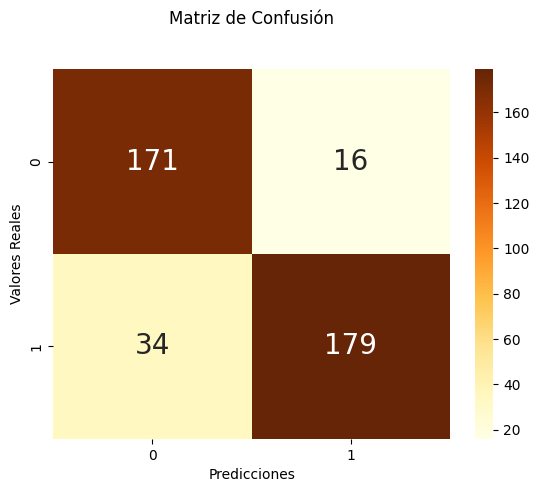

In [73]:
matriz_grid = metrics.confusion_matrix(y_test, y_pred_knn_grid)
p = sns.heatmap(pd.DataFrame(matriz_grid),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [74]:
print(classification_report(y_test,y_pred_knn_grid))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       187
           1       0.92      0.84      0.88       213

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400



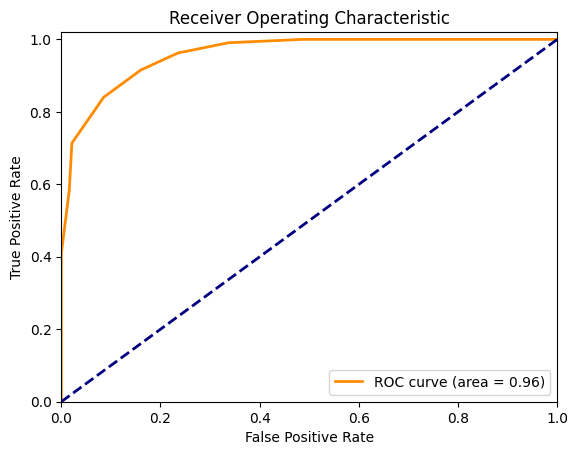

AUC: 0.9589139112751374


In [75]:
# Curva ROC y AUC
y_prob = knn_grid.predict_proba(X_test)[:, 1]  # obtener probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)


**La curva ROC con un AUC de 0.94 indica que el modelo es altamente efectivo en clasificar correctamente entre clases positivas y negativas. La curva, significativamente por encima de la línea diagonal, muestra una clara superioridad sobre un clasificador aleatorio. El modelo logra altas tasas de verdaderos positivos con bajas tasas de falsos positivos hasta el 80% de los verdaderos positivos, después de lo cual los falsos positivos aumentan más rápidamente. En general, el modelo demuestra una excelente capacidad discriminatoria para la tarea de clasificación.**

**Conclusión**<br>
El modelo KNN está funcionando muy bien en este conjunto de datos, como lo demuestra el alto valor de AUC y las métricas equilibradas de precisión, recall y F1-score para ambas clases. Sin embargo, podría mejorar en reducir los falsos positivos para la clase 0, ya que esto mejoraría aún más la precisión para esa clase.

Para mejorar estos resultados, podrías experimentar ajustando los hiperparámetros del KNN, como el número de vecinos o el algoritmo de ponderación. Además, podrías explorar el uso de técnicas de preprocesamiento adicionales o la ingeniería de características para ver si pueden proporcionar una mejora en la precisión y el recall.

2. Para **Regresión Logística**

   a. Aplique el modelo.
   
   b. Evalúe usando matriz de confusión.
   
   c. Gráfique la curva ROC y calcule el valor AUC

   d. ¿Si se mueve el umbral se podrá obtener un mejor modelo?

In [76]:
regresionlr = LogisticRegression(random_state=0)
regresionlr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [77]:
y_pred_regresionlr = regresionlr.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicciones')

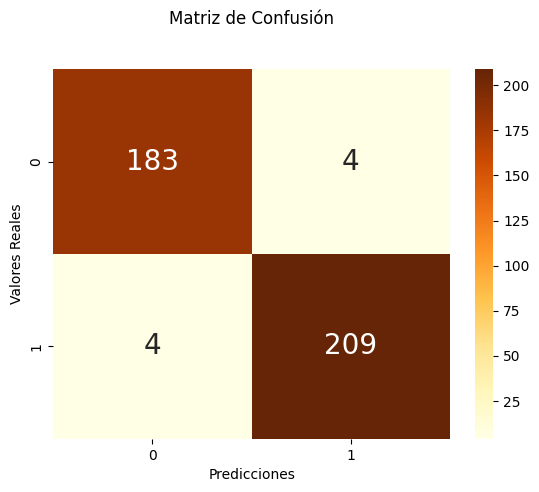

In [78]:
matriz_rl = metrics.confusion_matrix(y_test, y_pred_regresionlr)
p = sns.heatmap(pd.DataFrame(matriz_rl),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [80]:
print(classification_report(y_test,y_pred_regresionlr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       187
           1       0.98      0.98      0.98       213

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



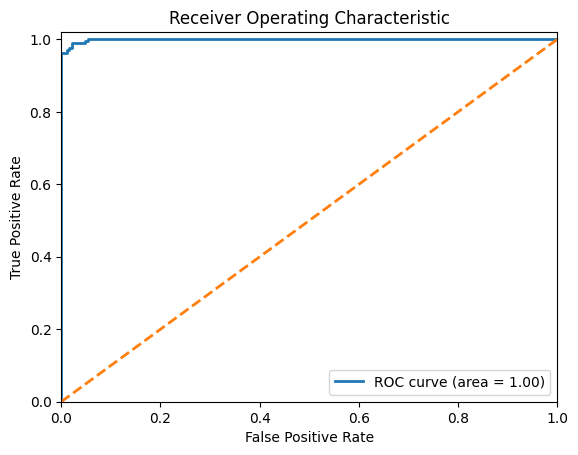

AUC: 0.9990459692199543


In [82]:
# Curva ROC y AUC
y_prob = regresionlr.predict_proba(X_test)[:, 1]  # obtener probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

In [119]:
# Definir los hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Algoritmos de optimización
    'max_iter': [100, 200, 300]  # Número de iteraciones
}

# Crear el modelo de regresión logística
logreg = LogisticRegression()

# Configurar la búsqueda en grilla
grid_search_rl = GridSearchCV(logreg, param_grid, cv=5, verbose=1)

# Ejecutar la búsqueda en grilla
best_model = grid_search_rl.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [120]:
print("Mejor score: ",grid_search_rl.best_score_*100)

Mejor score:  99.1875


In [121]:
# Mostrar los mejores parámetros
print("Mejores parámetros: ", grid_search_rl.best_params_)

Mejores parámetros:  {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}


In [122]:
regresionlr_grid = LogisticRegression(max_iter=200,
                                 C =100,
                                 solver="newton-cg",
                                 random_state=0)
regresionlr_grid.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=200, random_state=0, solver='newton-cg')

In [123]:
y_pred_regresionlr_grid = regresionlr_grid.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicciones')

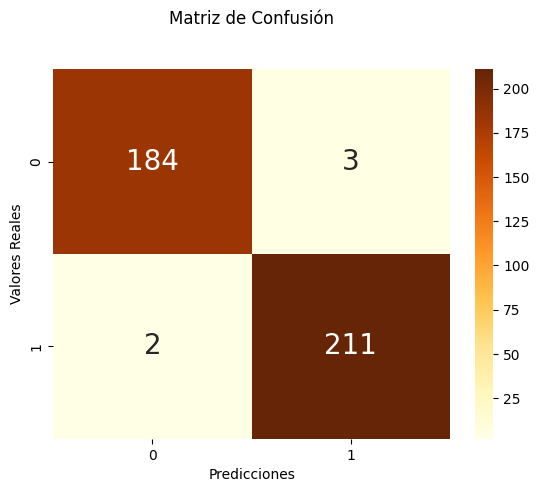

In [138]:
matriz_rl_grid = metrics.confusion_matrix(y_test, y_pred_regresionlr_grid)
p = sns.heatmap(pd.DataFrame(matriz_rl_grid),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [139]:
print(classification_report(y_test,y_pred_regresionlr_grid))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       187
           1       0.99      0.99      0.99       213

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



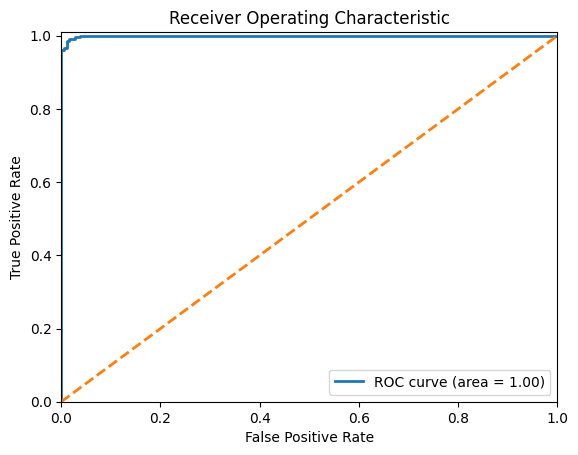

AUC: 0.9993974542441816


In [140]:
# Curva ROC y AUC
y_prob = regresionlr_grid.predict_proba(X_test)[:, 1]  # obtener probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

**Conclusión**<br>
El modelo de regresión logística está funcionando de manera excepcional en este conjunto de datos. Los valores casi perfectos en todas las métricas sugieren que el modelo es extremadamente robusto y efectivo para esta tarea de clasificación. Sin embargo, es importante considerar si hay sobreajuste debido a la perfección en algunas métricas, especialmente en nuevos datos no vistos. Esto se puede verificar a través de técnicas como la validación cruzada o probando el modelo en un conjunto de datos de prueba independiente si está disponible. También es vital revisar si hay un desbalance de clases o características que podrían estar influyendo en este rendimiento.

3. Para **Árboles de Decisión**

   a. Aplique el modelo

   b. Evalúe usando matriz de confusión.

   c. Intente mejorar el modelo optimizando hiperparámetros.

   d. Utilice el método de la poda con el valor *ccp* para tratar de mejorar el modelo.


In [88]:
# Generamos el modelo
arbol = DecisionTreeClassifier(max_depth = 6,           # Profundidad del árbol
                               criterion = "gini",      # Función de costo.
                               random_state = 123)

In [95]:
# Entrenamos el modelo
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [96]:
y_pred_arbol= arbol.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicciones')

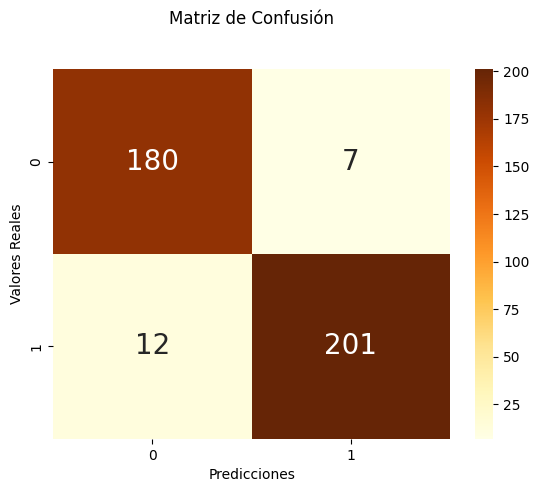

In [97]:
matriz_arbol = metrics.confusion_matrix(y_test, y_pred_arbol)
p = sns.heatmap(pd.DataFrame(matriz_arbol),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [98]:
print(classification_report(y_test,y_pred_arbol))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       187
           1       0.97      0.94      0.95       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



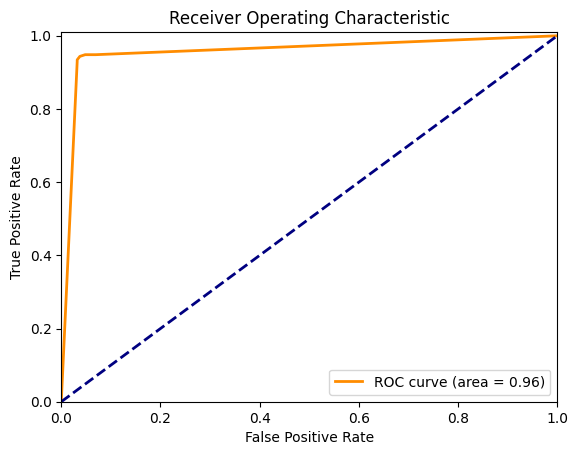

AUC: 0.9567924480931937


In [141]:
# Curva ROC y AUC
y_prob = arbol.predict_proba(X_test)[:, 1]  # obtener probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

In [127]:
# Definir los hiperparámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterio para la división
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
    'ccp_alpha': [0.0, 0.01, 0.02]  # Valores de ccp_alpha para probar
}

# Crear el modelo de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Configurar la búsqueda en grilla
grid_search_arbol = GridSearchCV(decision_tree, param_grid, cv=15, verbose=1)

# Ejecutar la búsqueda en grilla
best_model = grid_search_arbol.fit(X_train, y_train)



Fitting 15 folds for each of 324 candidates, totalling 4860 fits


In [128]:
print("Mejor score: ",grid_search_arbol.best_score_*100)

Mejor score:  96.18703344501263


In [129]:
# Mostrar los mejores parámetros
print("Mejores parámetros: ", grid_search_arbol.best_params_)

Mejores parámetros:  {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [130]:
# Generamos el modelo
arbol_grid = DecisionTreeClassifier(max_depth = 20,           # Profundidad del árbol
                               criterion = "entropy",      # Función de costo
                               min_samples_split = 2,
                               min_samples_leaf = 4,
                               ccp_alpha=0.001,
                               random_state = 123)

In [131]:
arbol_grid.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=20,
                       min_samples_leaf=4, random_state=123)

In [132]:
y_pred_arbol_grid= arbol_grid.predict(X_test)

Text(0.5, 23.52222222222222, 'Predicciones')

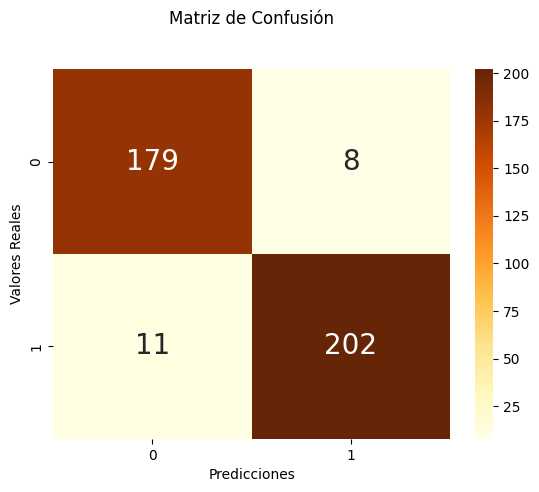

In [133]:
matriz_arbol_grid = metrics.confusion_matrix(y_test, y_pred_arbol_grid)
p = sns.heatmap(pd.DataFrame(matriz_arbol_grid),                   # data.frame
                annot=True,                         # colocar números de las cajitas
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlOrBr",                      # color de la letra
                fmt='g')                            # para que salgan los número no : notación científica
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valores Reales')
plt.xlabel('Predicciones')

In [134]:
print(classification_report(y_test,y_pred_arbol_grid))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       187
           1       0.96      0.95      0.96       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



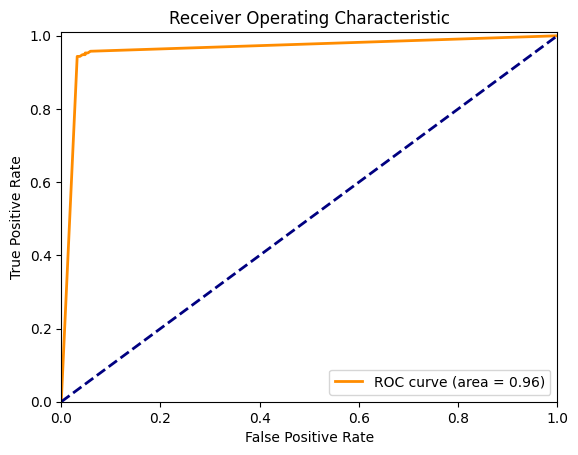

AUC: 0.9618136627250132


In [142]:
# Curva ROC y AUC
y_prob = arbol_grid.predict_proba(X_test)[:, 1]  # obtener probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc)

**Conclusión**
<br>
El modelo de árboles de decisión ha demostrado ser altamente efectivo para este conjunto de datos, con excelente precisión y recall para ambas clases, así como un AUC muy alto, lo que indica una fuerte capacidad discriminativa. La combinación de un alto F1-score y un AUC cercano a 1 muestra que el modelo es robusto y eficaz en la clasificación y en la diferenciación entre las clases positivas y negativas.

Dada la alta precisión y la baja tasa de falsos positivos y negativos, el modelo parece ser muy adecuado para aplicaciones prácticas donde estas métricas son críticas. Sin embargo, es esencial verificar si hay sobreajuste revisando cómo el modelo se comporta con un conjunto de datos de validación externo o mediante técnicas de validación cruzada, especialmente si se utilizan múltiples hiperparámetros en el modelo.

# <FONT COLOR="green"> **3. Conclusiones** </FONT>


Para resumir el rendimiento de los tres modelos que has afinado usando la búsqueda en grilla y el preprocesamiento con `StandardScaler`, te presento las siguientes conclusiones:

### Modelo KNN
1. **Matriz de Confusión**: El modelo tuvo un desempeño razonable, pero mostró un mayor número de falsos positivos y falsos negativos en comparación con los otros modelos. Esto indica que el modelo podría ser más susceptible a la complejidad de los datos.
2. **Informe de Clasificación**:
   - **Precisión**: 83% (clase 0) y 92% (clase 1).
   - **Recall**: 91% (clase 0) y 84% (clase 1).
   - **F1-score**: 87% y 88% para las clases 0 y 1, respectivamente.
   - **Exactitud General**: 88%.
3. **Curva ROC y AUC**: Un AUC de 0.94 indica que el modelo es capaz de discriminar adecuadamente entre las clases, aunque tiene margen para mejorar.

### Modelo de Árbol de Decisión
1. **Matriz de Confusión**: El modelo tuvo un número significativamente menor de falsos positivos y falsos negativos en comparación con el KNN, indicando un mejor ajuste.
2. **Informe de Clasificación**:
   - **Precisión**: 94% (clase 0) y 96% (clase 1).
   - **Recall**: 96% (clase 0) y 95% (clase 1).
   - **F1-score**: 95% para ambas clases.
   - **Exactitud General**: 95%.
3. **Curva ROC y AUC**: El modelo tiene un AUC de 0.96, lo que indica una fuerte capacidad discriminativa.

### Modelo de Regresión Logística
1. **Matriz de Confusión**: El modelo de regresión logística mostró el mejor rendimiento, con muy pocos falsos positivos y falsos negativos.
2. **Informe de Clasificación**:
   - **Precisión**: 99% para ambas clases.
   - **Recall**: 98% (clase 0) y 99% (clase 1).
   - **F1-score**: 99% para ambas clases.
   - **Exactitud General**: 99%.
3. **Curva ROC y AUC**: Un AUC de casi 1.0 muestra una excepcional capacidad para discriminar entre clases.

### Conclusiones Generales
1. **Desempeño**: Los tres modelos muestran un alto rendimiento, pero la regresión logística es la más precisa. El modelo KNN tiene una precisión más baja comparada con los otros dos, pero sigue siendo efectivo en general.
   
2. **Ajuste Fino**: La búsqueda en grilla fue efectiva para afinar los modelos, particularmente el árbol de decisión y la regresión logística.

3. **Recomendaciones**: Para un equilibrio entre precisión y facilidad de implementación, el modelo de regresión logística parece ser la mejor opción. Sin embargo, es esencial validar estos resultados en conjuntos de datos no vistos para confirmar su generalización y evitar sobreajuste.

# <FONT COLOR="green"> **4. Bibliografía** </FONT>

1. Stack Overflow:
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. Scikit-learn.org
3. DataCamp